# Main code to run the **Detection**

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import csv

import pandas as pd
from scipy.signal import medfilt
from scipy.interpolate import interp1d

## Creation of the Circle_positions file

If not present the file */data/auxiliary_data/Circle_positions.csv* run the Detection code in order to produce it

In [ ]:
# %load ~/projects/IACV_project/bowling-analysis/notebook/ball_detection/Detection.py

In [ ]:
PROJECT_ROOT = Path().resolve().parent.parent
INPUT_VIDEO_PATH = str(PROJECT_ROOT / "data" / "recording_4" / "Recording_4_normal_speed.mp4")
OUTPUT_VIDEO_PATH = str(PROJECT_ROOT / "data" / "recording_4" / "Output_detected_test_4.mp4")
OUTPUT_CSV_PATH = str(PROJECT_ROOT / "data" / "auxiliary_data" / "Circle_positions_4.csv")

%run -i ~/projects/IACV_project/bowling-analysis/notebook/ball_detection/Detection.py

Processed 228 frames. 
Circle positions saved to /home/davic/projects/IACV_project/bowling-analysis/data/auxiliary_data/Circle_positions_4.csv.


## Post processing of the Circle_positions file

In [ ]:
def load_and_clean_data(filename):
    # Load CSV file
    df = pd.read_csv(filename)
    
    # Convert empty strings to NaN
    df[['X', 'Y']] = df[['X', 'Y']].apply(pd.to_numeric, errors='coerce')
    
    # Identify valid trajectory range (first and last valid points)
    #first_valid = df[['X', 'Y']].first_valid_index()
    #last_valid = df[['X', 'Y']].last_valid_index()
    #df = df.loc[first_valid:last_valid]
    
    # Interpolate missing values
    df['X'] = df['X'].interpolate()
    df['Y'] = df['Y'].interpolate()

    # Fill any remaining NaN values with forward and backward fill
    df['X'] = df['X'].bfill().ffill()
    df['Y'] = df['Y'].bfill().ffill()
    
    # Apply median filter to smooth noise (kernel size 5)
    df['X'] = medfilt(df['X'], kernel_size=5)
    df['Y'] = medfilt(df['Y'], kernel_size=5)

    # Convert coordinates to integers
    df['X'] = df['X'].round().astype(int)
    df['Y'] = df['Y'].round().astype(int)
    
    return df

In [89]:
def plot_trajectory(df):
    plt.figure(figsize=(8,6))
    plt.plot(df['X'], -df['Y'], 'o-', label='Cleaned Trajectory')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Cleaned Ball Trajectory')
    plt.legend()
    plt.show()

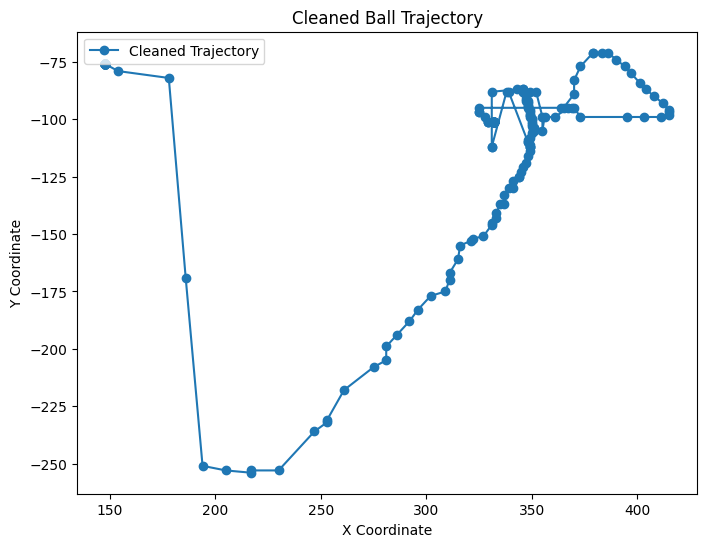

In [90]:
# Example usage
CSV_FILE_PATH = str(PROJECT_ROOT / "data" / "auxiliary_data" / "Circle_positions_4.csv")
cleaned_df = load_and_clean_data(CSV_FILE_PATH)
plot_trajectory(cleaned_df)

# Save cleaned data
OUTPUT_CSV_PATH = str(PROJECT_ROOT / "data" / "auxiliary_data" / "Circle_positions_4_clean.csv")
cleaned_df.to_csv(OUTPUT_CSV_PATH, index=False)

Here the things to do are:
- make the trajectory smoother
- delete outliers (easier with track detection)
- start and finish detection when the ball enters and exits the track (required track detection)